# A repeat of the Salish_winds_2015 using numeric values for months in order to extract analysis window. Plotting winds >7 m/s for each month in atmospheric forcing files

## now try to figure out how to index months by converting numeric month into text index

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import math
import numpy as np
import arrow
import cmocean

# need datetime for converting between numeric and string indexing of time
from datetime import date

%matplotlib inline


In [ ]:
ds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
ds

In [58]:
month = 1
time_01_15 = ds.time.sel(time=slice("2015-01-01","2015-01-31")).values
strmn = str(month)
strmn

'1'

In [49]:

test = date(2015,1,1)
test

datetime.date(2015, 1, 1)

In [56]:
test.strftime("%y-%m-%d")

'15-01-01'

In [57]:
test.strftime("%Y-%m-%d")

'2015-01-01'

In [63]:
# old way: specify date
# jan2015_time = ds.time.sel(time=slice("2015-01-01","2015-01-31")).values

# new way: Use numeric date value (in preparation to create a loop)
t1 = date(2015,1,1)
t2 = date(2015,1,1)
time_period = ds.time.sel(time=slice(t1.strftime("%Y-%m-%d"),t2.strftime("%Y-%m-%d"))).values
time_period

array(['2015-01-01T00:00:00.000000000', '2015-01-01T01:00:00.000000000',
       '2015-01-01T02:00:00.000000000', '2015-01-01T03:00:00.000000000',
       '2015-01-01T04:00:00.000000000', '2015-01-01T05:00:00.000000000',
       '2015-01-01T06:00:00.000000000', '2015-01-01T07:00:00.000000000',
       '2015-01-01T08:00:00.000000000', '2015-01-01T09:00:00.000000000',
       '2015-01-01T10:00:00.000000000', '2015-01-01T11:00:00.000000000',
       '2015-01-01T12:00:00.000000000', '2015-01-01T13:00:00.000000000',
       '2015-01-01T14:00:00.000000000', '2015-01-01T15:00:00.000000000',
       '2015-01-01T16:00:00.000000000', '2015-01-01T17:00:00.000000000',
       '2015-01-01T18:00:00.000000000', '2015-01-01T19:00:00.000000000',
       '2015-01-01T20:00:00.000000000', '2015-01-01T21:00:00.000000000',
       '2015-01-01T22:00:00.000000000', '2015-01-01T23:00:00.000000000'], dtype='datetime64[ns]')

In [64]:
jan2015_wspd = np.sqrt(ds.u_wind.sel(time = time_period)**2 + ds.v_wind.sel(time = time_period)**2)

thresh = 7
wspd_size = jan2015_wspd.shape
total = wspd_size[0]

In [65]:
# Create numpy array for percentage value output
wspd_2D_percent = np.zeros((wspd_size[1],wspd_size[2]))
for iy in range(0,wspd_size[1]):
    for ix in range(0,wspd_size[2]):
        wspd_ts = jan2015_wspd[:,iy,ix]
        wspd_ts_thresh =  wspd_ts[wspd_ts > thresh]
        wspd_2D_percent[iy,ix] = 100 * len(wspd_ts_thresh) / total

Text(0,0.5,'%')

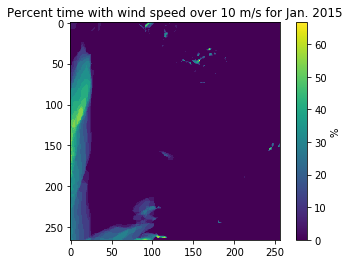

In [66]:
fig, ax = plt.subplots()
cax = ax.imshow(np.flipud(wspd_2D_percent))
ax.set_title('Percent time with wind speed over 10 m/s for Jan. 2015')
cbar = fig.colorbar(cax, orientation='vertical')
cbar.ax.set_ylabel('%')